# letNet-5 on MNIST  
In this project, we utilized the LeNet-5 architecture to build and optimize a Convolutional Neural Network (CNN) for digit classification using the MNIST dataset, which consists of 70,000 grayscale images of handwritten digits. By employing Keras Tuner to explore various hyperparameters, including learning rate, batch size, and epochs, we fine-tuned the model for optimal performance. The result was an impressive **accuracy of 99.3%** on the MNIST test set, demonstrating the efficacy of the LeNet-5 architecture and the precision of hyperparameter tuning in achieving near-perfect classification results.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist 
from tensorflow.keras import layers, models
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
print (f"train images shape is :{train_images.shape}")
print (f"test images shape is:{test_images.shape}")

train images shape is :(60000, 28, 28)
test images shape is:(10000, 28, 28)


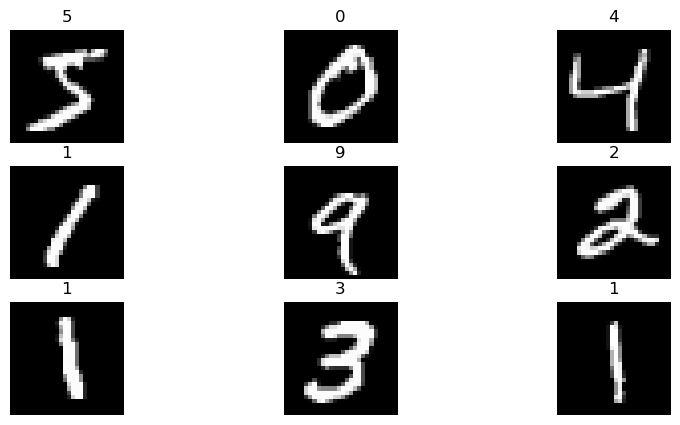

In [3]:
fig, ax = plt.subplots(3, 3, figsize= (10, 5))
subset_index = np.arange(9)
subset_image = train_images[subset_index]
subset_label = train_labels[subset_index]
for i in range(3):
    for j in range(3):
        index = i * 3 + j 
        ax[i][j].imshow(subset_image[index], cmap= 'gray')
        ax[i][j].set_title(subset_label[index])
        ax[i][j].axis('off')


##### *I tried using batch normalization but noticed that it did not affect the model's accuracy.*
##### *I also found that a dropout rate of 0.4 in dropout layers is effective.*

In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Change filter size to (3,3)
    layers.Dropout(0.4),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Dropout(0.4),    
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Dropout(0.4),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\mo7am\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
!pip install keras-tuner


#### *Fine tunning* 

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt

# Define the model-building function
def build_model(hp):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.Dropout(0.4),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Dropout(0.4),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Dropout(0.4),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    
    # Tune the learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-1, 1e-2, 1e-3])
    
    model.compile(optimizer=Adam(learning_rate=hp_learning_rate), 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    
    return model

# Instantiate the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Number of different hyperparameter settings to try
    executions_per_trial=1,  # Number of times to test each setting
    directory='my_dir',
    project_name='mnist_tuning'
)

# Define and run the hyperparameter search
tuner.search(
    train_images, 
    train_labels, 
    epochs=kt.HyperParameters().Int('epochs', min_value=15, max_value=25, step=3),
    batch_size=kt.HyperParameters().Choice('batch_size', values=[32, 64, 128]),
    validation_split=0.2
)

# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters: {best_hps.values}")

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model on the test set
test_loss, test_accuracy = best_model.evaluate(test_images, test_labels)
print(f"best Test Accuracy: {test_accuracy}")
print(f"best Test Loss: {test_loss}")


Reloading Tuner from my_dir\mnist_tuning\tuner0.json
Best Hyperparameters: {'learning_rate': 0.001}
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9910 - loss: 0.0333
best Test Accuracy: 0.9933000206947327
best Test Loss: 0.02737606130540371
